# Supervised Learning - Artificial Intelligence

## Students' Dropout and Success

### Notebook by Henrique Pinho, João Lopes and Luís Marques

## Introduction

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

In this notebook, we will be using Supervised learning to predict if a student graduates or dropout.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import time
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [19]:
student_data = pd.read_csv('data.csv', delimiter=';')
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [20]:
student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [21]:
enrolled = student_data[student_data.Target == "Enrolled"].drop(columns=['Target'])
graduated = student_data[student_data.Target == "Graduate"].drop(columns=['Target'])
dropout = student_data[student_data.Target == "Dropout"].drop(columns=['Target'])

Text(0.5, 1.0, 'Enrolled')

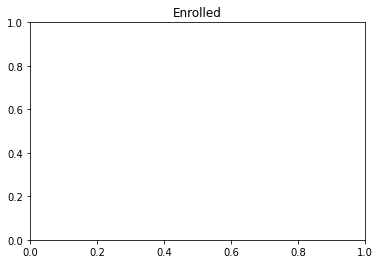

In [22]:
enrolled_dict = enrolled.sum().to_dict()
plt.title('Enrolled')
#plt.barh(list(enrolled_dict.keys()), list(enrolled_dict.values()))

In [23]:
graduated_dict = graduated.sum().to_dict()
#plt.title('Graduated')
#plt.barh(graduated_dict.keys(), graduated_dict.values())

<BarContainer object of 3 artists>

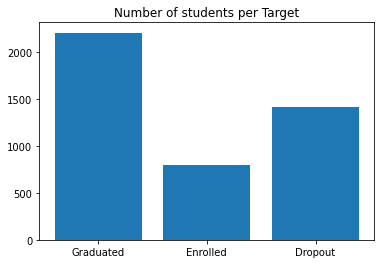

In [24]:
plt.title('Number of students per Target')
plt.bar(['Graduated', 'Enrolled', 'Dropout'], [len(graduated), len(enrolled), len(dropout)])

In [25]:
student_data_clean = student_data.drop(student_data[student_data['Target'] == 'Enrolled'].index, inplace=False)
student_data_clean.describe()
#student_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [26]:
graduate_data = student_data_clean[student_data_clean.Target == 'Graduate']
graduate_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,...,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000
mean,1.134903,15.018108,1.851064,8917.248076,0.909009,4.031236,134.082707,1.745134,19.311453,22.499774,...,0.088275,0.666818,6.628339,8.142146,6.177003,12.697276,0.080579,11.639339,1.197918,0.081833
std,0.525526,16.627271,1.395516,1919.444837,0.287662,9.805602,13.342121,5.790637,15.590923,15.225751,...,0.589686,2.211709,2.297197,3.245912,2.268622,2.685608,0.522872,2.601474,1.371116,2.261081
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,7.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,0.600000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [27]:
dropout_data = student_data_clean[student_data_clean.Target == 'Dropout']
dropout_data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1.261084,23.712878,1.593244,8755.629838,0.854328,5.311049,131.114075,1.957072,21.035186,22.683322,...,0.192118,0.449683,5.780436,7.173821,1.940183,5.899339,0.237861,11.616397,1.283955,-0.150859
std,0.721958,17.150593,1.215769,2278.779477,0.352901,10.309934,12.873354,7.838977,15.523817,15.357099,...,0.794591,1.679548,2.108249,4.817374,2.573691,6.118740,0.994210,2.768259,1.404970,2.251768
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,7.000000,1.000000,9085.000000,1.000000,1.000000,122.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,22.000000,...,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,137.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,6.000000,10.000000,4.000000,11.833333,0.000000,13.900000,2.600000,1.740000
max,6.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,8.000000,16.000000,18.000000,25.000000,16.000000,17.714286,12.000000,16.200000,3.700000,3.510000


voltar aqui

In [28]:
graduate_data_1 = graduate_data.iloc[:500,:]
graduate_data_2 = graduate_data.iloc[500:1000,:]
graduate_data_3 = graduate_data.iloc[1000:1500,:]
graduate_data_4 = graduate_data.iloc[1500:,:]

graduate_data_1_sample = graduate_data_1.sample(n=350, axis=0)
graduate_data_2_sample = graduate_data_2.sample(n=350, axis=0)
graduate_data_3_sample = graduate_data_3.sample(n=350, axis=0)
graduate_data_4_sample = graduate_data_4.sample(n=350, axis=0)



graduate_sample = pd.concat([graduate_data_1_sample, graduate_data_2_sample, graduate_data_3_sample, graduate_data_4_sample])
graduate_sample.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1.130714,15.274286,1.817857,8951.114286,0.907857,4.282143,133.953357,1.612857,19.229286,22.400000,...,0.075000,0.638571,6.634286,8.148571,6.191429,12.742101,0.075000,11.718857,1.184857,0.104164
std,0.532758,16.691000,1.353405,1840.024693,0.289331,10.279773,13.171492,5.030157,15.599605,15.222862,...,0.492347,2.153362,2.209984,3.097313,2.207709,2.585925,0.482077,2.593157,1.363267,2.257307
min,1.000000,1.000000,0.000000,171.000000,0.000000,1.000000,97.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,126.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,6.000000,5.000000,12.166667,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,10.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,6.000000,13.000000,0.000000,11.100000,0.600000,0.790000
75%,1.000000,18.000000,2.000000,9500.000000,1.000000,1.000000,141.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,8.000000,9.000000,7.000000,14.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,184.400000,103.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,26.000000,20.000000,17.692308,6.000000,16.200000,3.700000,3.510000


In [29]:
student_data_clean = pd.concat([graduate_sample, dropout_data])
student_data_clean.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000
mean,1.196384,19.524991,1.704715,8852.644452,0.880893,4.800425,132.523148,1.786246,20.138958,22.542715,...,0.133995,0.543424,6.204183,7.657568,4.049982,9.295251,0.157037,11.667246,1.234775,-0.024296
std,0.638372,17.439332,1.290586,2074.615026,0.323971,10.306003,13.097047,6.597337,15.584903,15.288573,...,0.664540,1.931259,2.200773,4.084446,3.205157,5.820569,0.787183,2.682803,1.385072,2.257724
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.285714,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,26.000000,20.000000,17.714286,12.000000,16.200000,3.700000,3.510000


In [30]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

#sb.pairplot(student_data_clean.sample(100), hue='Target')
;

''

/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/home/luis/.local/lib/python3.8/site-packages/seaborn/utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
/home/luis/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


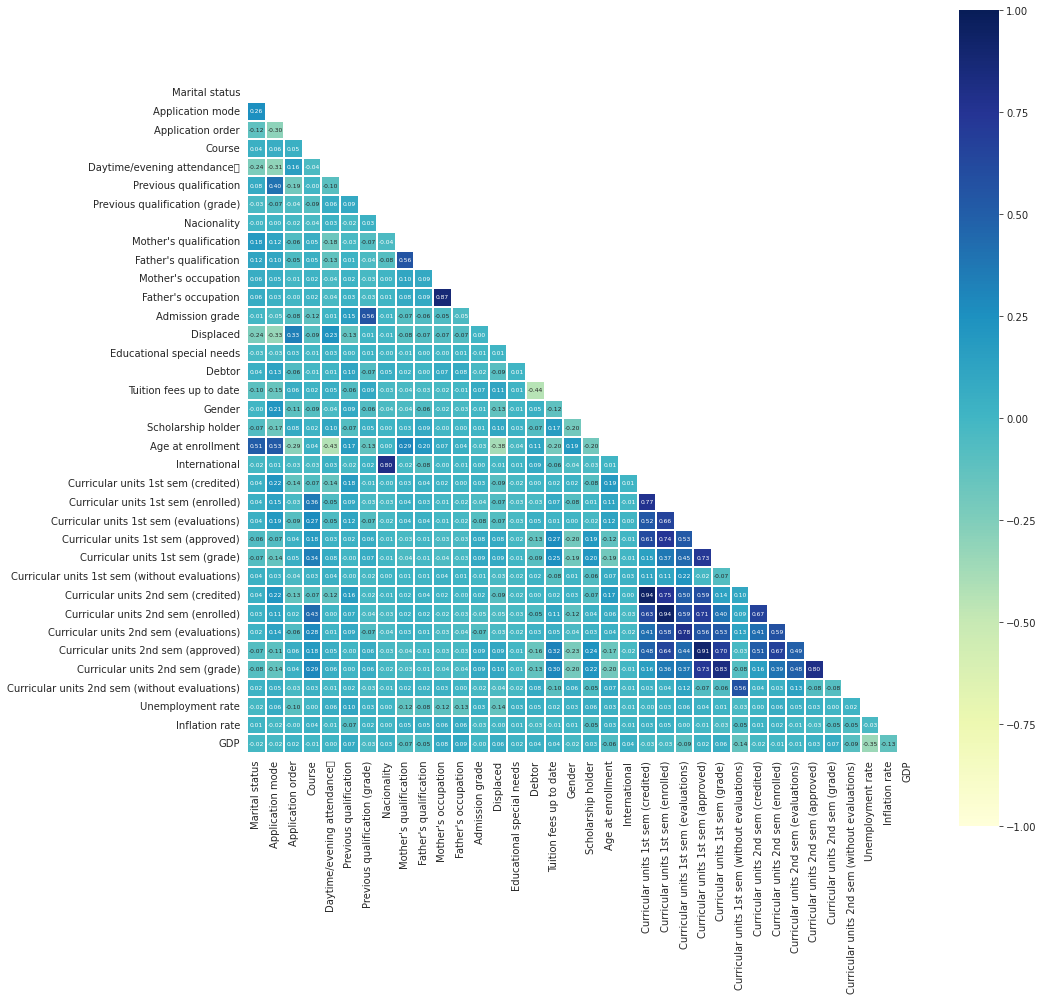

In [31]:
student_data_corr = student_data_clean.corr()
mask = np.zeros_like(student_data_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sb.axes_style("white"):
    ax = sb.heatmap(student_data_corr, linewidths=0.1, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 6}, vmax=1, vmin=-1)
    plt.show()

Que dados tem muita correlaçao uns com os outros, mais de 90 faz drop

In [32]:
student_data_corr = student_data_clean.corr().abs()

upper = student_data_corr.where(np.triu(np.ones(student_data_corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

old_n_columns = len(student_data_clean.columns)

student_data_clean.drop(to_drop, axis=1, inplace=True)

print('Dropped ' + str(old_n_columns-len(student_data_clean.columns)) + ' columns')
student_data_clean.describe()

Dropped 3 columns


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000
mean,1.196384,19.524991,1.704715,8852.644452,0.880893,4.800425,132.523148,1.786246,20.138958,22.542715,...,7.978731,4.381071,9.942516,0.133995,7.657568,9.295251,0.157037,11.667246,1.234775,-0.024296
std,0.638372,17.439332,1.290586,2074.615026,0.323971,10.306003,13.097047,6.597337,15.584903,15.288573,...,4.333308,3.258559,5.379038,0.664540,4.084446,5.820569,0.787183,2.682803,1.385072,2.257724
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,6.000000,1.000000,10.500000,0.000000,6.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,8.000000,5.000000,12.121429,0.000000,8.000000,12.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,10.000000,6.000000,13.333333,0.000000,10.000000,13.285714,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,45.000000,26.000000,18.875000,12.000000,26.000000,17.714286,12.000000,16.200000,3.700000,3.510000


para ir buscar data a table

In [33]:
def get_inputs_labels(dataset, scaler=None):
    all_inputs = dataset.drop('Target', axis=1)
    all_labels = dataset['Target']
    
    if scaler != None:
        scaler = scaler.fit(all_inputs)
        all_inputs = scaler.transform(all_inputs)

    return all_inputs, all_labels
        
all_inputs, all_labels = get_inputs_labels(student_data_clean)

para tunning

In [34]:



def tune_model(dataset, model_instance, parameter_grid, cross_validation=StratifiedKFold(n_splits=10), scaler=None, oversample=False): 
    all_inputs, all_labels = get_inputs_labels(dataset, scaler)
    
    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)


    grid_search = GridSearchCV(
        model_instance,
        param_grid=parameter_grid,
        cv=cross_validation,
        scoring="f1_weighted"
    )

    grid_search.fit(all_inputs, all_labels)
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))

    grid_search.best_estimator_
    return grid_search

medir tempo

In [35]:



def measure_time(dataset, model_instance, params, scaler=None, oversample=False):
    all_inputs, all_labels = get_inputs_labels(dataset, scaler)

    if oversample:
        steps = [('sampling', SMOTE()), ('model', model_instance)]
        model_instance = Pipeline(steps=steps)
    model_instance.set_params(**params)

    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
    
    start = time.time()
    model_instance.fit(training_inputs, training_classes)
    end = time.time()
    return end - start

Serapar casos teste e casos treino

In [36]:
columns = student_data.columns

col_list = list(columns)

all_inputs = student_data[col_list[:-1]].values

all_labels = student_data['Target'].values

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)


Decision Tree

In [37]:


decision_tree_classifier = DecisionTreeClassifier()


parameters = {'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [8],
            }



decision_tree_w_parameters = GridSearchCV(decision_tree_classifier,
                            param_grid=parameters)


decision_tree_w_parameters.fit(training_inputs, training_classes)

with open('decision_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_w_parameters.best_estimator_ , out_file=out_file)

decision_tree_w_parameters.score(testing_inputs, testing_classes)


0.7549728752260397

In [39]:


parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 9),
    'max_features': range(1, 9)
}

dt_original = tune_model(student_data, DecisionTreeClassifier(), parameter_grid)

Best score: 0.7185413854638372
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'splitter': 'best'}


In [22]:
dt = tune_model(student_data_clean, DecisionTreeClassifier(), parameter_grid)

Best score: 0.851465604667147
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 8, 'splitter': 'best'}


In [23]:
parameter_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random'],
    'model__max_depth': range(1, 7),
    'model__max_features': range(1, 7)
}

dt_os_fs = tune_model(student_data_clean, DecisionTreeClassifier(), parameter_grid, oversample=True)

Best score: 0.843429790398714
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 6, 'model__max_features': 6, 'model__splitter': 'best'}


SVM

Text(0.5, 1.0, 'Average score: 0.501593865122923')

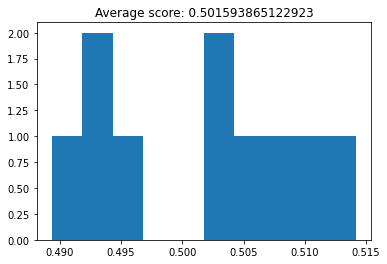

In [ ]:
X, y = get_inputs_labels(student_data_clean)

# Without standardizing the data:
svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, X, y, cv=10)

plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

Text(0.5, 1.0, 'Average score: 0.501593865122923')

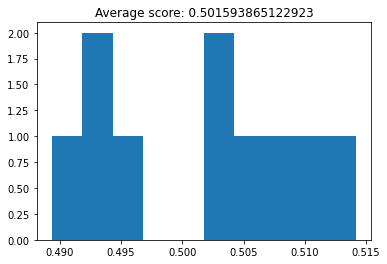

In [ ]:
# Standardizing the data:
standardized_X, y = get_inputs_labels(student_data_clean, scaler = StandardScaler())

svc = SVC()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(svc, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

umas merdas

In [ ]:
parameter_grid = {
    'C': [1, 10, 50], 
    'gamma': [0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf']
    #'kernel': ['linear', 'rbf', 'sigmoid']
}

# No oversampling / No feature selection
svc_original = tune_model(student_data, SVC(), parameter_grid, scaler=StandardScaler())

KeyboardInterrupt: 

In [ ]:
# No oversampling / Feature selection
svc = tune_model(student_data_clean, SVC(), parameter_grid, scaler=StandardScaler())

Best score: 0.8839028034514769
Best parameters: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
parameter_grid = {
    'model__C': [1, 10, 50], 
    'model__gamma': [0.001, 0.0001],
    # 'kernel': ['linear', 'poly', 'rbf']
    'model__kernel': ['linear', 'rbf', 'sigmoid']
}

# Oversampling / Feature Selection
svc_os_fs = tune_model(student_data_clean, SVC(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8828181314621002
Best parameters: {'model__C': 50, 'model__gamma': 0.001, 'model__kernel': 'rbf'}


K-nearest neighbours (KNN)

''

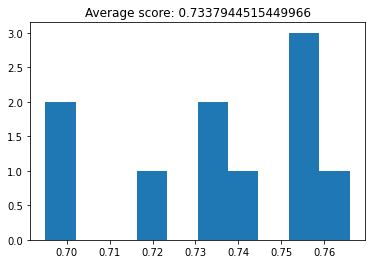

In [ ]:
# Without standardizing the data

X, y = get_inputs_labels(student_data_clean)

knn = neighbors.KNeighborsClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(knn, X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

''

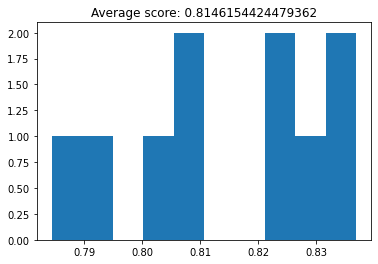

In [ ]:
# Standardizing the data
standardized_X, y = get_inputs_labels(student_data_clean, scaler=StandardScaler())

knn = neighbors.KNeighborsClassifier()

cv_scores = cross_val_score(knn, standardized_X, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

In [ ]:
parameter_grid =  {
    'n_neighbors':[4,5,6,7,10,15],
    'leaf_size':[5, 10, 15, 20, 50, 100],
    'n_jobs':[-1],
    'algorithm':['auto']
}

# No oversampling / No feature selection
knn = neighbors.KNeighborsClassifier()
knn_original = tune_model(student_data, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.6880458285094058
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 7}


In [ ]:
# No oversampling / Feature selection
knn = neighbors.KNeighborsClassifier()
knn = tune_model(student_data_clean, knn, parameter_grid, scaler=StandardScaler())

Best score: 0.817876701185382
Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 10}


In [ ]:
parameter_grid = {
    'model__n_neighbors':[4,5,6,7,10,15],
    'model__leaf_size':[5, 10, 15, 20, 50, 100],
    'model__n_jobs':[-1],
    'model__algorithm':['auto']
}

# Oversampling / Feature Selection
knn_os_fs = tune_model(student_data_clean, neighbors.KNeighborsClassifier(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8181503846945837
Best parameters: {'model__algorithm': 'auto', 'model__leaf_size': 20, 'model__n_jobs': -1, 'model__n_neighbors': 10}


Naive Bayes

In [ ]:


parameter_grid = {}

# No oversampling / No feature selection
nb_original = tune_model(student_data, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.6642678607484849
Best parameters: {}


In [ ]:
# No oversampling / Feature selection
nb = tune_model(student_data_clean, GaussianNB(), parameter_grid, scaler=StandardScaler())

Best score: 0.8119868090372536
Best parameters: {}


In [ ]:
parameter_grid = {}

# Oversampling / Feature Selection
nb_os_fs = tune_model(student_data_clean, GaussianNB(), parameter_grid, scaler=StandardScaler(), oversample=True)

Best score: 0.8112696701926829
Best parameters: {}


Random Forest Classifier

In [ ]:


# parameter_grid = {
#     'n_estimators': [100,200],
#     'max_depth': [8, 9, 10],
#     'n_jobs': [-1], #Use all cores
#     'max_features': ['auto', 'sqrt'],
#     'criterion': ['gini', 'entropy']
# }

parameter_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 15],
    'n_jobs': [-1], #Use all cores
    'criterion': ['gini', 'entropy']
}

# No oversampling / No feature selection
rfc_original = tune_model(student_data, RandomForestClassifier(), parameter_grid)

Best score: 0.7598988984277961
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100, 'n_jobs': -1}


In [ ]:
# No oversampling / Feature selection
rfc = tune_model(student_data_clean, RandomForestClassifier(), parameter_grid)

Best score: 0.8843100174421272
Best parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1}


In [ ]:
parameter_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [5, 10, 15],
    'model__n_jobs': [-1], #Use all cores
    'model__criterion': ['gini', 'entropy']
}

# Oversampling / Feature Selection
rfc_os_fs = tune_model(student_data_clean, RandomForestClassifier(), parameter_grid, oversample=True)

Best score: 0.8863996207302659
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__n_estimators': 50, 'model__n_jobs': -1}


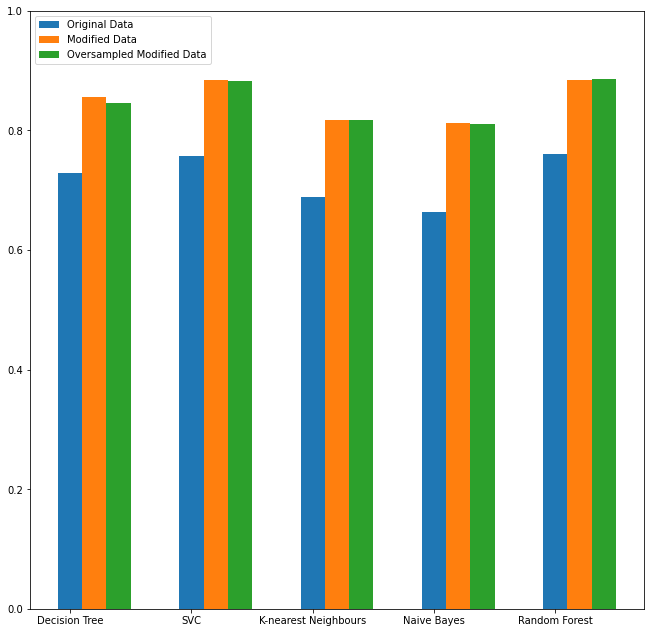

In [ ]:
scores = {
    "Decision Tree" : [dt_original, dt, dt_os_fs],
    "SVC" : [svc_original, svc, svc_os_fs],
    "K-nearest Neighbours" : [knn_original, knn, knn_os_fs],
    "Naive Bayes" : [nb_original, nb, nb_os_fs],
    "Random Forest" : [rfc_original, rfc, rfc_os_fs]
}

labels = ["Original Data","Modified Data", "Oversampled Modified Data"]

ind = np.arange(5)

plt.figure(figsize=(11,11))
plt.bar(ind, [i[0].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1].best_score_ for i in scores.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2].best_score_ for i in scores.values()], 0.2)
plt.xticks(ind, scores.keys())
plt.legend(labels,loc=2)
plt.ylim(0, 1)
plt.show()

analyzing times

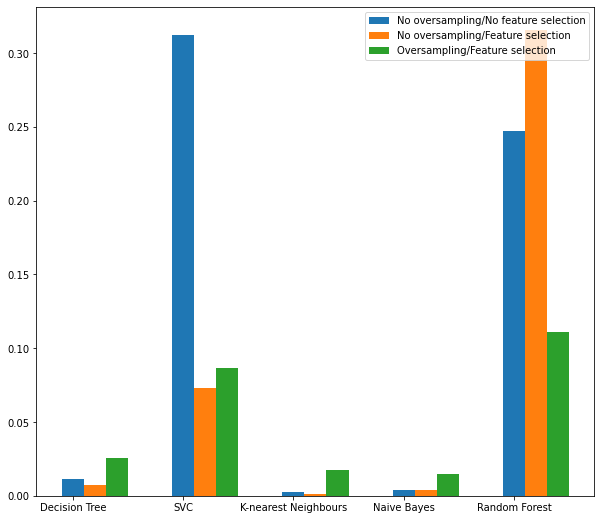

In [ ]:
times = {
    "Decision Tree" : [
        measure_time(student_data, DecisionTreeClassifier(), dt_original.best_params_),
        measure_time(student_data_clean, DecisionTreeClassifier(), dt.best_params_),
        measure_time(student_data_clean, DecisionTreeClassifier(), dt_os_fs.best_params_, oversample=True)
    ],
    "SVC" : [
        measure_time(student_data, SVC(), svc_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, SVC(), svc.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, SVC(), svc_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "K-nearest Neighbours" : [
        measure_time(student_data, neighbors.KNeighborsClassifier(), knn_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, neighbors.KNeighborsClassifier(), knn.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, neighbors.KNeighborsClassifier(), knn_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Naive Bayes" : [
        measure_time(student_data, GaussianNB(), nb_original.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, GaussianNB(), nb.best_params_, scaler=StandardScaler()),
        measure_time(student_data_clean, GaussianNB(), nb_os_fs.best_params_, oversample=True, scaler=StandardScaler())
    ],
    "Random Forest" : [
        measure_time(student_data, RandomForestClassifier(), rfc_original.best_params_),
        measure_time(student_data_clean, RandomForestClassifier(), rfc.best_params_),
        measure_time(student_data_clean, RandomForestClassifier(), rfc_os_fs.best_params_, oversample=True)
    ]
}

labels = ["No oversampling/No feature selection","No oversampling/Feature selection", "Oversampling/Feature selection"]

ind = np.arange(5)

plt.figure(figsize=(10,9))
plt.bar(ind, [i[0] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.2, [i[1] for i in times.values()], 0.2)
ax = plt.bar(ind + 0.4, [i[2] for i in times.values()], 0.2)
plt.xticks(ind, times.keys())
plt.legend(labels,loc=1)

# plt.ylim(0.7, 1)
plt.show()

conclusao

somos burros inteligentes